# Performances: Generalization, Regularization

In [1]:
%matplotlib inline
import math
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import fmin, minimize

In [2]:
# Logistic Regression
# Kernel Trick
# Decision Boundary -> theta( mx + c ) ---> stright line
# theta ( ax^2 + bx + c ) --> parabolic 
# theta (ax^2 + by^2 + cx + dy + exy + f) --> ellipses
# theta (ax^100 by^100 ....................) --> dog --> 10,000 parameters --> Don't

1) Try to fit the following data with a straight line(y=mx+c). Plot data points along with actual function and your line.

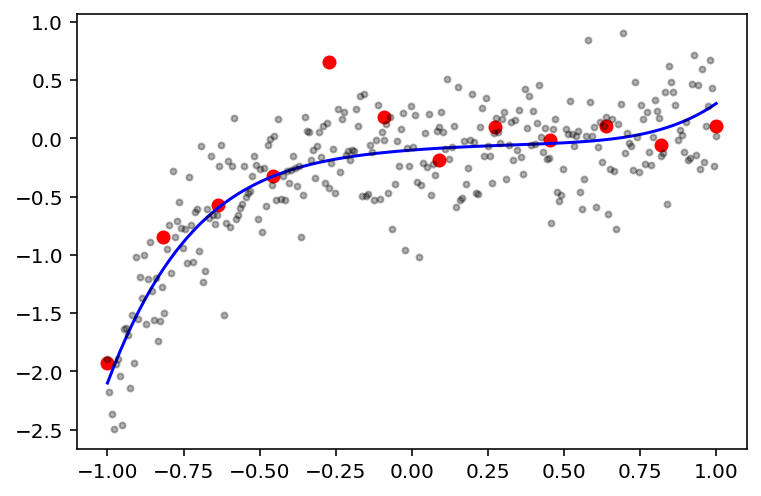

In [5]:
np.random.seed(7777)
ndata = 12
z = [0.6, -0.5, 0.4, -0.3, 0.2, -0.1]
a,b,c,d,e,f = z
noise = 0.3
xs = np.linspace(-1, 1, ndata)
tx = xs
ys = (a*tx**5 + b*tx**4 + c*tx**3 + d*tx**2 + e*tx + f) + np.random.randn(ndata)*noise
actualxs = np.linspace(-1,1,100)
tx = actualxs
actualys = (a*tx**5 + b*tx**4 + c*tx**3 + d*tx**2 + e*tx + f)

ntest = 300
testxs = np.linspace(-1,1,ntest)
tx = testxs
testys = (a*tx**5 + b*tx**4 + c*tx**3 + d*tx**2 + e*tx + f) + np.random.randn(ntest)*noise

plt.plot(xs, ys,'or')
plt.plot(actualxs, actualys,'b')
plt.plot(testxs, testys, '.k', alpha=0.3)

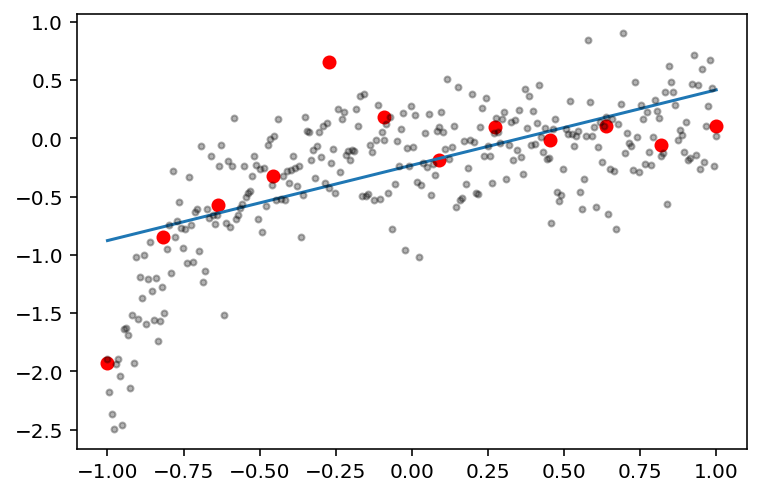

In [8]:
# I'm being nice
def guess(w, x):
    m, c = w
    return m*x + c

def cost(w):
    return sum((yy - guess(w,xx))**2 for xx, yy in zip(xs, ys))/len(xs)
    
w = minimize(cost, [0,0]).x

newx = np.linspace(-1, 1, 100)
newy = [guess(w, xx) for xx in newx]
plt.plot(xs, ys, 'or')
plt.plot(newx, newy)
#plt.plot(actualxs, actualys)
plt.plot(testxs, testys, '.k', alpha=0.3)

In [11]:
# red dots --> train blue line
# In sample error --> red dots and blue line (error while training)

# real performance -> blue line vs green dots
# Out of sample error --> gray and blue line (error in real world (actual usage))

2) What is your in-sample error? $E_{in}$

In [ ]:
# training sample vs model

3) What is your out-sample error? $E_{out}$

In [ ]:
# test sample vs model

4) Between $E_{in}$ and $E_{out}$
- Which one do we really want to optimize? 
- Which one do we actually optimize when we train our model?

In [ ]:
# we want Eout but we train with Ein

4.5) Now find $E_{in}$ and $E_{out}$ for the example above.

In [12]:
def error(guess, w, xs, ys):
    return 1/len(xs) * sum((guess(w, x) - y)**2 for x, y in zip(xs, ys))
ein = error(guess, w, xs, ys)
eout = error(guess, w, testxs, testys)
print(ein)
print(eout)

0.2304716499317206
0.192979095977486


5) Now Try fit it with polynomial degree 2 ($y = ax^2 + bx + c)$. Same deal, plot, find $E_{in}$ and $E_{out}$. (Think about a generic function that does this for any number of degree)

6) Try it with degree 3, 4, 5 ... 11. Can you explain what happen at degree 11?

<span style="color:red;"> DO NOT COPY PASTE codes. Write a function and use for loop </span>

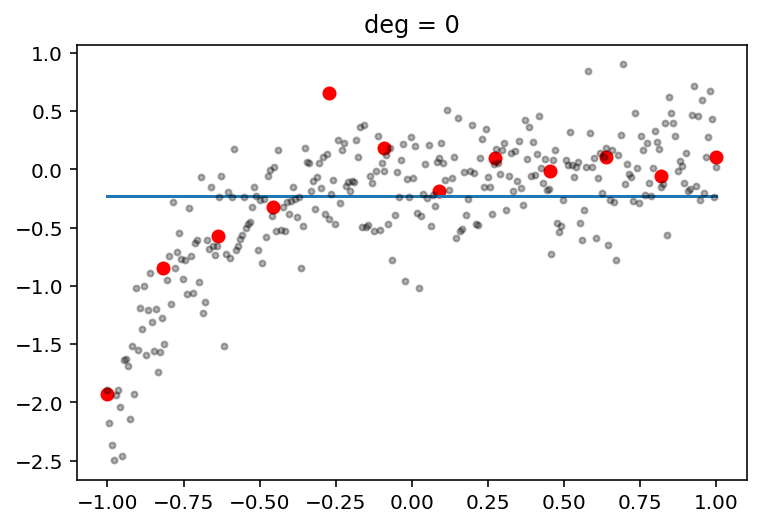

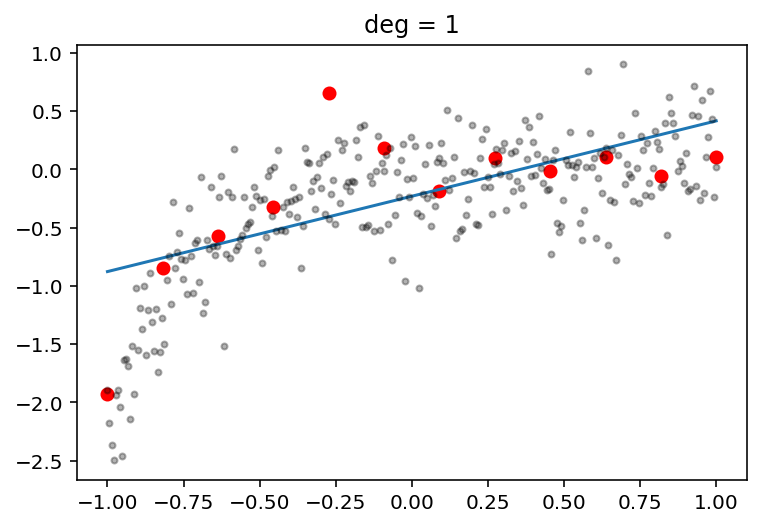

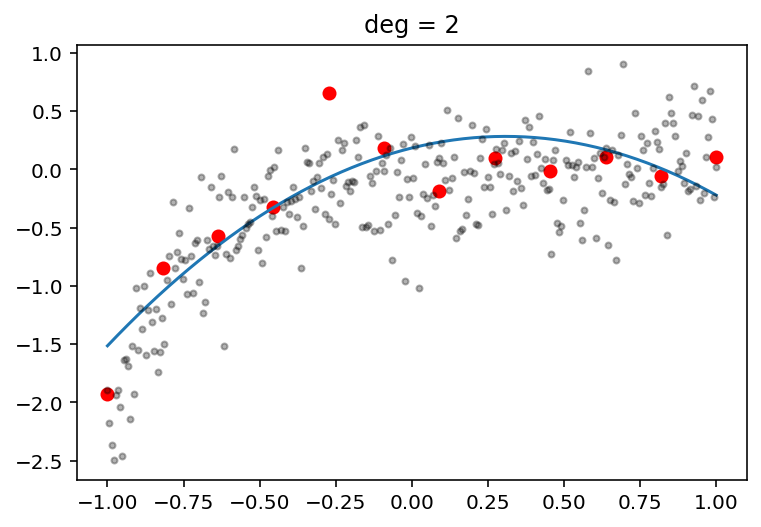

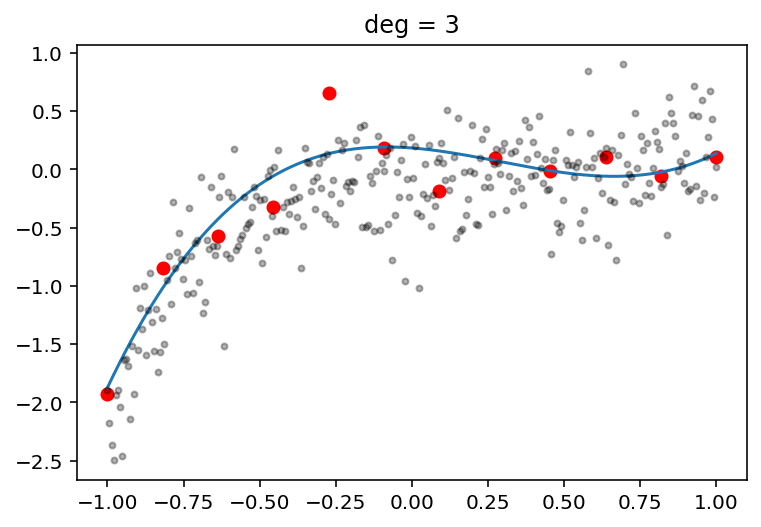

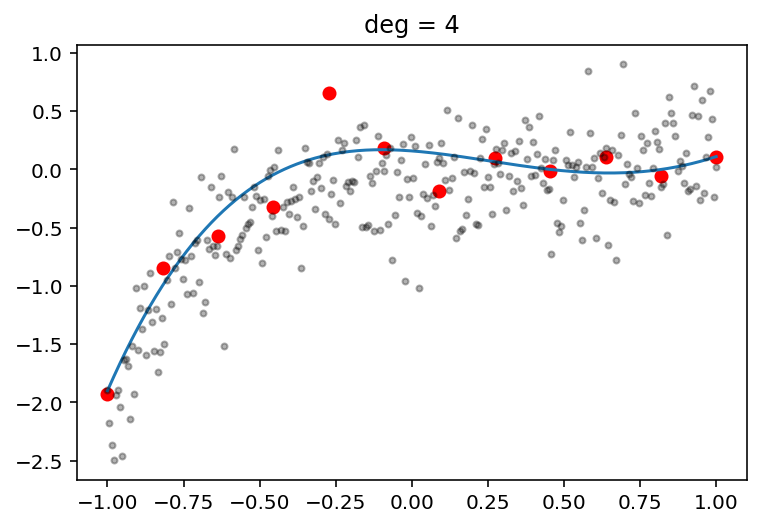

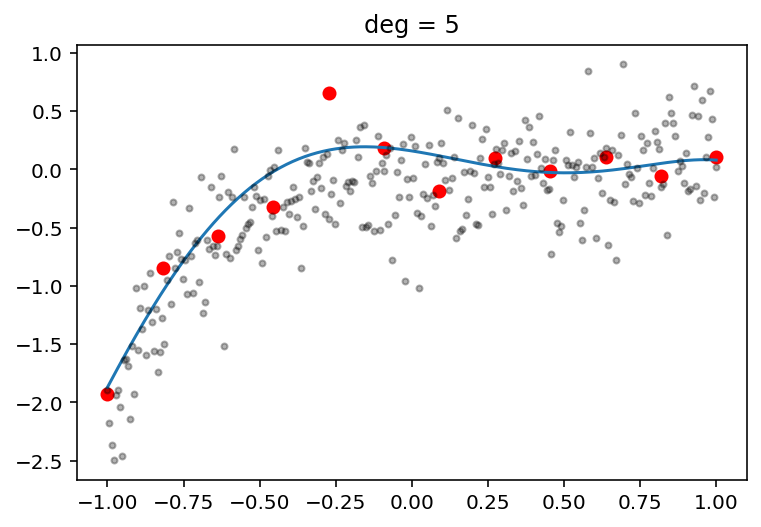

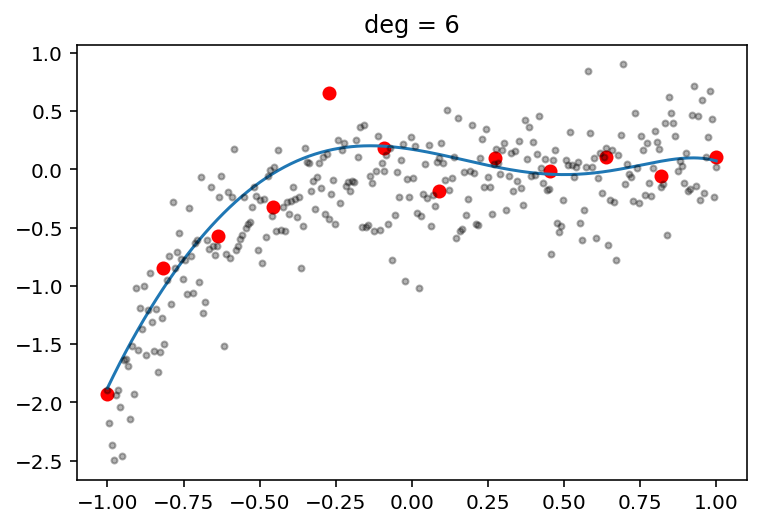

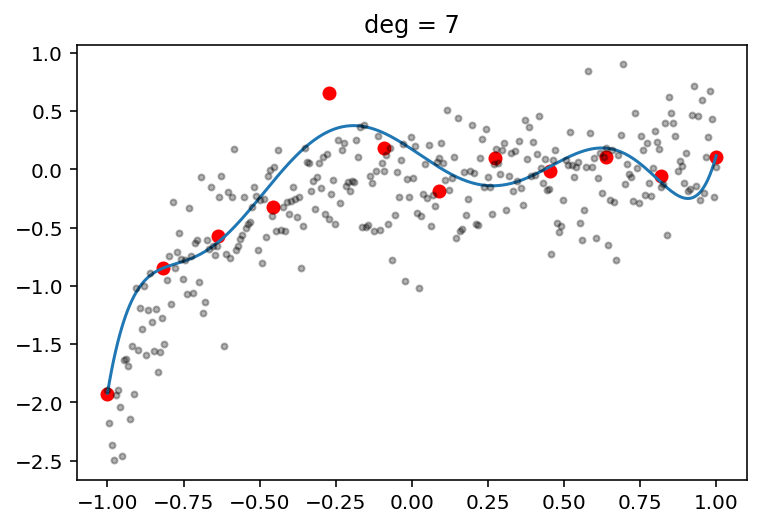

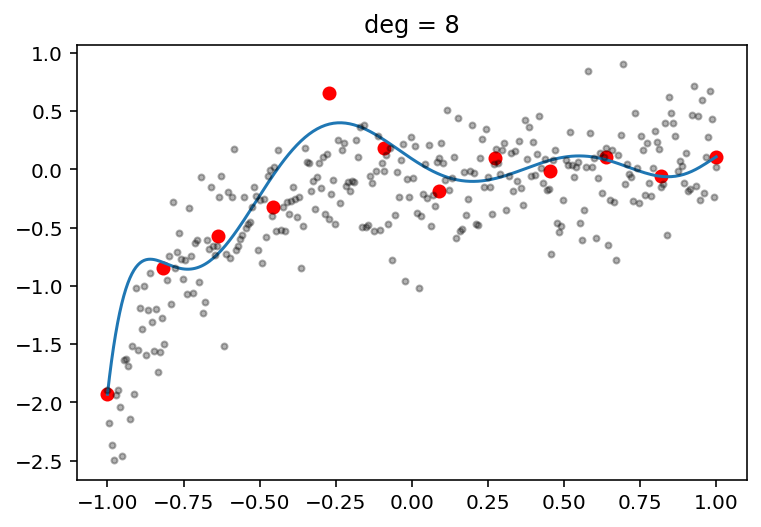

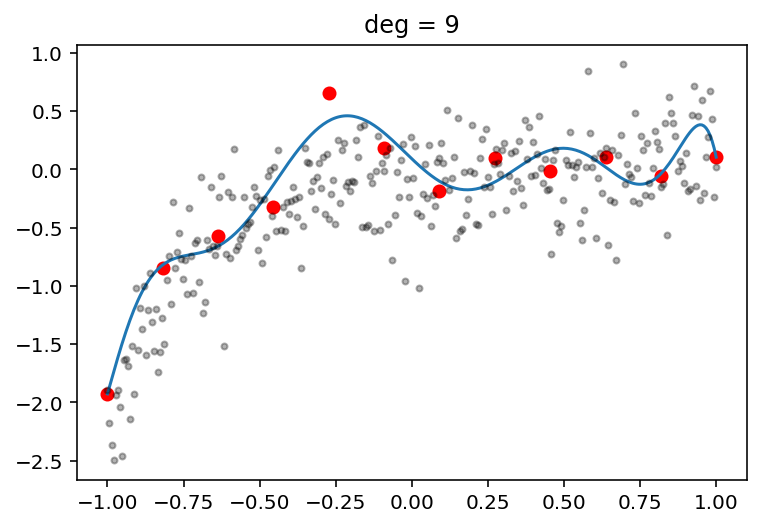

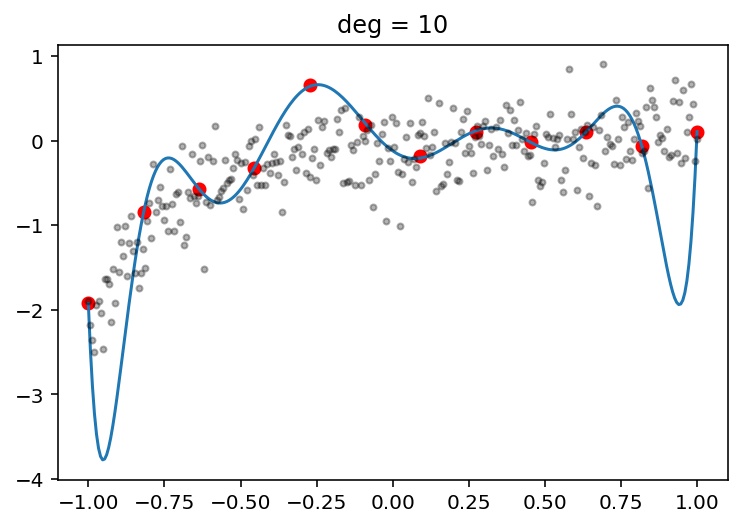

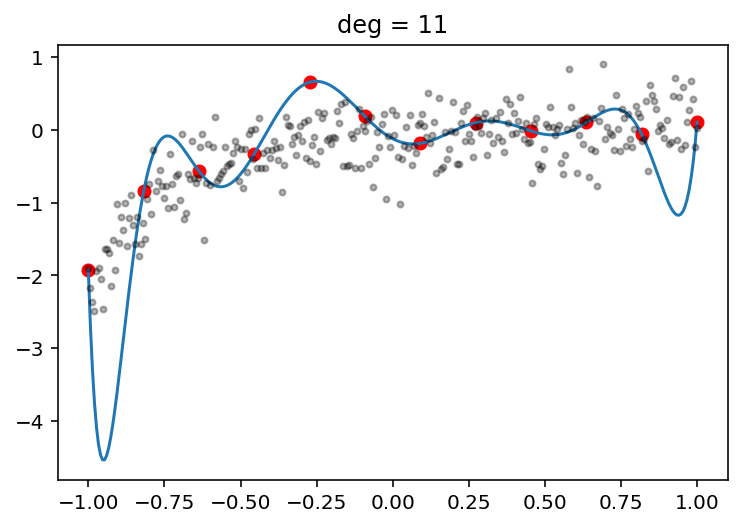

In [19]:
degrees = list(range(0,12))
eins = []
eouts = []
for deg in degrees:
    plt.figure()
    w = np.polyfit(xs ,ys, deg)
    def guess(w, x):
        return np.poly1d(w)(x)
    y_guess = guess(w, testxs)
    plt.plot(xs, ys, 'or')
    plt.plot(testxs, y_guess)
    #plt.plot(actualxs, actualys)
    plt.plot(testxs, testys, '.k', alpha=0.3)
    plt.title(f'deg = {deg}')
    ein = error(guess, w, xs, ys)
    eout = error(guess, w, testxs, testys)
    eins.append(ein)
    eouts.append(eout)

7) Now plot polynomial degree vs $E_{in}$ and degree vs $E_{out}$

[0.3953118106052599, 0.23047164993171027, 0.09606251741787859, 0.04543364721889845, 0.04496507551182302, 0.04384627562887321, 0.04371481197156197, 0.024009067617991403, 0.02027814579871593, 0.017541746288852557, 0.00013465365490443408, 1.0641127526092775e-25] [0.3522639350725975, 0.19297908455846607, 0.15607341817442885, 0.13279545301433288, 0.1307238968551167, 0.1318410563896613, 0.13216696763693156, 0.17354224532776463, 0.18278758553735858, 0.16447804501842375, 0.5130773686475155, 0.5438388773207025]


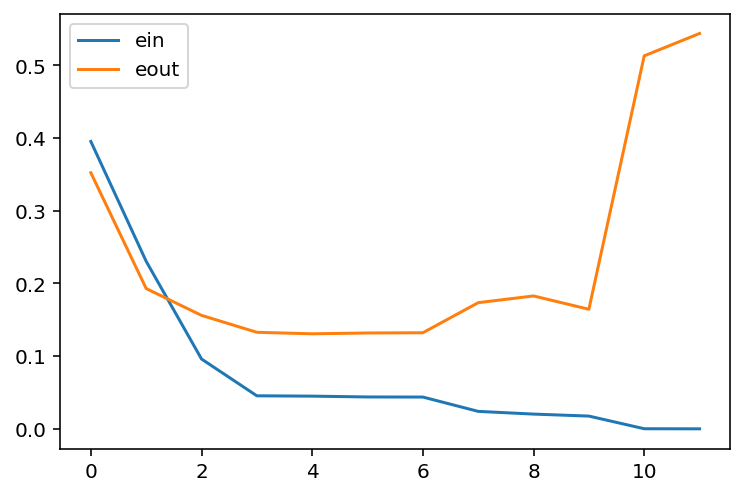

In [23]:
print(eins, eouts)
plt.plot(degrees, eins, label='ein')
plt.plot(degrees, eouts, label='eout')
plt.legend()

8) Explain why you see the graph you see in above.

- What's wrong with model that is too simple
- What's wrong with model that is too complex

# Regularization.

1) Print $w$ from those degree 11 polynomial model. What went wrong with overly complex model?

2) How should we penalize the model to prevent overly complex model?

In particular, what is does the penalized cost function looks like?

3) What happen if our penalty is too small? What happend if our penalty is too big?

4) If $\lambda$ is small do we expect to get complex or simple model? Why?

5)Try Regularize with $\lambda=1\times10^{-8}$, $\lambda=0.01$ and $\lambda=100$

# Model Selection

1) Why don't  we just use every single data to train?

2) What is validation data set for?

3) Why can't use validation set to report the expected out of sample performance?

4) What is test data set for?

5) What's wrong if we use too much data set for validation and test sample?

6) Sketch by hand $E_{in}$ and $E_{out}$ vs $\lambda$. Then, Try plotting $\log(1/\lambda)$ vs Ein and Eout. 

# Cross-Validation

1) What was the problem with using 1 validation data set?

2) How does cross validation solves it?

3) In what kind of situation radomized stratification is a bad idea?

4) If we want to report our $E_{out, expected} = x \pm \delta x$, how should we get $x$ and $\delta x$

5) Try find that number for $\lambda = 0.01$

6) What happen to the test set? Do we still need it?

7) Summarize the steps we should to to obtain, evaluate and ship the model.

# Logistic regression revisited

(if we have time if not it's your hw)

Combine what we just learned so far and build a classifier for this data

[[ 1.          2.83183225  2.21788396]
 [ 1.          3.24505985  1.33380711]
 [ 1.          4.20791006  2.17029943]
 ..., 
 [-1.          5.79041673  3.63972547]
 [-1.          6.88819689  4.26226006]
 [-1.         -0.78355493  4.35778885]]


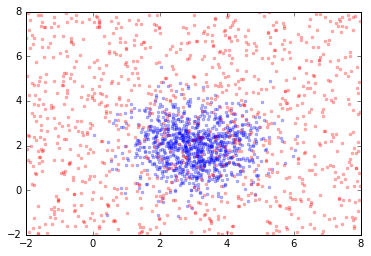

In [133]:

class1 = np.zeros((1000,3))
class1[:, 0] = 1.
class1[:, 1] = np.random.randn(1000)+3
class1[:, 2] = np.random.randn(1000)+2

class2 = np.zeros((1000,3))
class2[:, 0] = -1
class2[:, 1] = np.random.random(1000)*10-2
class2[:, 2] = np.random.random(1000)*10-2

data = np.concatenate([class1, class2])

class1idx = data[:,0] == 1

class2idx = data[:,0] == -1

plt.plot(data[class1idx, 1], data[class1idx, 2], '.b', alpha=0.3)
plt.plot(data[class2idx, 1], data[class2idx, 2], '.r', alpha=0.3)
print data